In [1]:
startSwank 4011

Checking SLIME_HOME
About to start swank server
Started swank server


T

In [ ]:
(setf fep::*testing* nil)

In [3]:
(setf *default-pathname-defaults* #P"~/Development/clomap/")

#P"/Users/yonkunas/Development/clomap/"

In [4]:
(asdf:load-asd "/Users/Yonkunas/Development/lomap/lomap.asd")

#<DEFINE-OP >

In [5]:
(asdf:load-system :lomap)

T

In [6]:
(setup-default-paths)

Paths: (/Users/yonkunas/Development/clomap/ /usr/local/amber18/dat/antechamber/
 /usr/local/amber18/dat/leap/cmd/ /usr/local/amber18/dat/leap/parm/
 /usr/local/amber18/dat/leap/lib/ /usr/local/amber18/dat/leap/prep/)


NIL

In [7]:
(load-atom-type-rules "ATOMTYPE_GFF.DEF")

#<FORCE-FIELD ATOMTYPE_GFF.DEF>

In [8]:
(source "/usr/local/amber18/dat/leap/cmd/oldff/leaprc.ff14SB.redq")

Warning!  Skipping 10-12 hbond in #<IOSTREAM-STREAM #P"/usr/local/amber18/dat/leap/parm/parm10.dat" file-pos 55972>
Warning!  Skipping force field atom equivalences in #<IOSTREAM-STREAM #P"/usr/local/amber18/dat/leap/parm/parm10.dat" file-pos 56054>
Adding force field parm10.dat to DEFAULT
Adding force field frcmod.ff14SB to DEFAULT


T

In [9]:
(source "leaprc.gaff")

Warning!  Skipping 10-12 hbond in #<IOSTREAM-STREAM #P"/usr/local/amber18/dat/leap/parm/gaff.dat" file-pos 477649>
Warning!  Skipping force field atom equivalences in #<IOSTREAM-STREAM #P"/usr/local/amber18/dat/leap/parm/gaff.dat" file-pos 477731>
Adding force field gaff.dat to DEFAULT


T

In [ ]:
(leap:add-pdb-res-map '((1 :NMA :NME)))

In [ ]:
(leap:add-pdb-atom-map '((:CA :CH3) (:1HA :HH31) (:2HA :HH32) (:3HA :HH33)
                         (:1H :HH31) (:2H :HH32) (:3H :HH33)
                         (:H2 :H)))

In [15]:
(defparameter mol2s (chem:load-mol2 "lomap_mols/ejm_31.mol2"))

MOL2S

In [16]:
mol2sk = (sketch2d:sketch2d (mol2s))


Undefined function MOL2S

An error occurred of type: UNDEFINED-FUNCTION: 
  The function MOL2S is undefined.

serious-condition backtrace:
0: (ERROR UNDEFINED-FUNCTION :NAME MOL2S)
1: (LAMBDA)
2: (_CCLASP-EVAL-WITH-ENV^CLASP-CLEAVIR^((T (MOL2S) NIL)
3: (INTERPRETED-DISCRIMINATING-FUNCTION (MOL2S) NIL)
4: (SIMPLE-EVAL (MOL2S) NIL #<STANDARD-GENERIC-FUNCTION CLASP-CLEAVIR::CCLASP-EVAL-WITH-ENV>)
5: (LAMBDA (MOL2S))
6: (MAPCAR #<FUNCTION LAMBDA> ((MOL2S)))
7: (SIMPLE-EVAL (SKETCH2D:SKETCH2D (MOL2S)) NIL #<STANDARD-GENERIC-FUNCTION CLASP-CLEAVIR::CCLASP-EVAL-WITH-ENV>)
8: (CCLASP-EVAL (SKETCH2D:SKETCH2D (MOL2S)) NIL)
9: (LAMBDA #<FUNCTION LAMBDA> :VALUE NIL (:S-EXPR NIL :VALUE (SKETCH2D:SKETCH2D (MOL2S)) :BOUNDS (9 . 36)) :S-EXPR NIL :VALUE (SKETCH2D:SKETCH2D (MOL2S)) :BOUNDS (9 . 36))
10: (APPLY4 #<FUNCTION LAMBDA> (:VALUE (SKETCH2D:SKETCH2D (MOL2S)) :BOUNDS (9 . 36)) #<FUNCTION LAMBDA> :VALUE NIL (:S-EXPR NIL :VALUE (SKETCH2D:SKETCH2D (MOL2S)) :BOUNDS (9 . 36)) :S-EXPR NIL)
11: (LAMBDA 

NIL

In [ ]:
(defparameter *tg* (molecule-graph.max-clique::test-cross-product))

In [ ]:
(molecule-graph.max-clique::cross-product-edges *tg*)

In [ ]:
(defparameter *td* (molecule-graph.max-clique::build-dimacs *tg*))

In [ ]:
(defparameter *mc* (molecule-graph.max-clique::dothing *td*))

In [ ]:
*mc*

In [ ]:
(molecule-graph.max-clique::extract-atom-pairs *tg* *mc*)

In [19]:
(defparameter mols (sdf:load-sdf-as-list-of-molecules "/Users/yonkunas/Development/fep-benchmark/eg5/ligands.sdf"))

Read molecule: #<MOLECULE :CHEMBL1078774 0>
Read molecule: #<MOLECULE :CHEMBL1093087 0>
Read molecule: #<MOLECULE :CHEMBL1082249 0>
Read molecule: #<MOLECULE :CHEMBL1089393 0>
Read molecule: #<MOLECULE :CHEMBL1078691 0>
Read molecule: #<MOLECULE :CHEMBL1086409 0>
Read molecule: #<MOLECULE :CHEMBL1082248 0>
Read molecule: #<MOLECULE :CHEMBL1084678 0>
Read molecule: #<MOLECULE :CHEMBL1084115 0>
Read molecule: #<MOLECULE :CHEMBL1084431 0>
Read molecule: #<MOLECULE :CHEMBL1085895 0>
Read molecule: #<MOLECULE :CHEMBL1084677 0>
Read molecule: #<MOLECULE :CHEMBL1077227 0>
Read molecule: #<MOLECULE :CHEMBL1086410 0>
Read molecule: #<MOLECULE :CHEMBL1083517 0>
Read molecule: #<MOLECULE :CHEMBL1096003 0>
Read molecule: #<MOLECULE :CHEMBL1077204 0>
Read molecule: #<MOLECULE :CHEMBL1083836 0>
Read molecule: #<MOLECULE :CHEMBL1085666 0>
Read molecule: #<MOLECULE :CHEMBL1085692 0>
Read molecule: #<MOLECULE :CHEMBL1084143 0>
Read molecule: #<MOLECULE :CHEMBL1096002 0>
Read molecule: #<MOLECULE :CHEMB

MOLS

In [ ]:
(lomap::similarity-matrix mols)

In [ ]:
(class-of mols)

In [ ]:
(length mols)

In [ ]:
(molecule-graph.max-clique::rename-atoms (first mols) "a")
(molecule-graph.max-clique::rename-atoms (second mols) "b")

In [ ]:
(defparameter *cg* (multiple-value-list (molecule-graph.max-clique::compare-molecules (first mols) (second mols))))

In [ ]:
(lomap::mcsr-similarity-score (first mols) (second mols))

In [ ]:
*cg*

In [ ]:
(length (first *cg*))

In [ ]:
(+ 19 2)

In [ ]:
(+ 19 4)

In [ ]:
(- (+ 23 21) (* 2 19))

In [ ]:
*cg*

In [ ]:
(multiple-value-list (molecule-graph:compare-molecules (first mols) (second mols) 
                                                       :atom-match-callback 'molecule-graph:element-match))

In [20]:
firstsk = (sketch2d:sketch2d (first mols))

#<SKETCH2D:SKETCH2D>

In [ ]:
nthsk = (sketch2d:sketch2d (nth 20 mols))

In [ ]:
(first mols)

In [ ]:
(show nthsk)

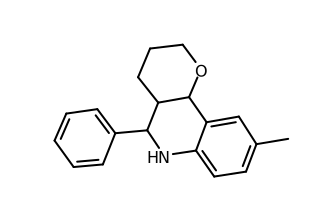

In [21]:
(show firstsk)

In [ ]:
(let ((sketch2d::*show-names* t)) (show (sketch2d:sketch2d (first mols))))

In [ ]:
show (defparameter *sk* (sketch2d:similar-sketch2d (nth 18 mols) firstsk))

In [ ]:
show (defparameter *sk* (sketch2d:similar-sketch2d (third mols) firstsk :accumulate-coordinates t))

In [ ]:
(length mols)

The following compares every molecule to every other molecule - it will take a LOOONG time

In [ ]:
(loop for xi below (1- (length mols))
      for molx = (elt mols xi)
      do (format t "xi -> ~a~%" xi)
      do (finish-output)
      do (loop for yi from (1+ xi) below (length mols)
               for moly = (elt mols yi)
               do (format t "   yi -> ~a~%" yi)
               do (finish-output)
               do (molecule-graph.max-clique:compare-molecules molx moly)))

In [ ]:
(defparameter *d* (sketch2d::dynamics *sk*))

In [ ]:
show *d*

In [ ]:
(defparameter feps (fep:fep-calculation-from-ligands mols))

In [ ]:
(defparameter receptor (load-pdb "eg5/3l9h_prepared.pdb"))

In [ ]:
;; For some reason the waters in receptor have residue name 'cando-user::tp3
;;  and they need to be :wat
(let ((changed 0))
  (cando:do-residues (res receptor)
    (when (eq (chem:get-name res) 'cando-user::tp3)
      (incf changed)
      (chem:set-name res :wat)))
  (format t "Changed ~d residue names from 'cando-user::tp3 to :wat~%" changed))

In [ ]:
(push receptor (fep:receptors feps))

In [ ]:
(fep:build-job-nodes feps)

In [ ]:
(fep:connect-job-nodes feps '((:chembl1082248 :chembl1083517)
                              (:chembl1082248 :chembl1084143)
                              #+(or)(:chembl1088740 :chembl1093088)))

In [ ]:
(fep:check-calculation-atom-types feps)

In [ ]:
(let* ((*default-pathname-defaults* (merge-pathnames #P"cando-fep-benchmarks/eg5/full/"))
       (worklist
         (progn
           (format t "generate-jobs to *default-pathname-defaults* -> ~s~%" *default-pathname-defaults*)
           (fep:generate-jobs feps))))
  (with-open-file (fout #P"jobs/conf.sh" :direction :output :if-exists :supersede)
    (format fout "pmemd_cuda=pmemd.cuda
execute_cpu_local=0
execute_gpu_local=0
execute_lisp_local=0
worker=schando
distributor=s103.thirdlaw.tech
lisp_jobs_only_on=172.234.2.1
"))
  (with-open-file (sout "/tmp/eg5.dot" :direction :output)
    (fepdot:draw-graph-stream (list worklist) sout))
  )